## **Workshop-Ablauf: "Zellen zählen ohne Handbremse – mit KI in 2 Stunden ein Forschungsprojekt"**

### **1. Begrüßung und Einführung (10 Minuten)**
- **Ziele des Workshops**: Was werden wir heute lernen und erleben?
- **Begriffsklärung**: Erklärung der Begriffe wie Hirnregionen, Zelldichte, etc.
- **Spannungsaufbau**: Warum ist die Erforschung der Zelldichte wichtig?

Willkommen zum Workshop!


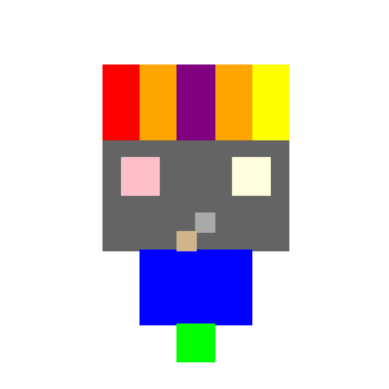

In [1]:
# Platzhalter für Begrüßungscode
print("Willkommen zum Workshop!")

from PIL import Image
import matplotlib.pyplot as plt

# Create a blank image with white background
width, height = 200, 200
image = Image.new('RGB', (width, height), 'white')
pixels = image.load()

# Define the regions and their colors
regions = {
    'Cerebrum': (100, 100, 100),    # Gray
    'Cerebellum': (0, 0, 255),      # Blue
    'Brainstem': (0, 255, 0),       # Green
    'Frontal Lobe': (255, 0, 0),    # Red
    'Parietal Lobe': (255, 255, 0),  # Yellow
    'Occipital Lobe': (255, 165, 0), # Orange
    'Temporal Lobe': (128, 0, 128),  # Purple
    'Broca\'s Area': (255, 192, 203), # Pink
    'Wernicke\'s Area': (255, 255, 224), # Light Yellow
    'Thalamus': (169, 169, 169),   # Dark Gray
    'Hypothalamus': (210, 180, 140) # Tan
}

# Draw the regions with spaces between pixels
for x in range(width):
    for y in range(height):
        if 50 <= x <= 150 and 70 <= y <= 130:
            pixels[x, y] = regions['Cerebrum']
        if 70 <= x <= 130 and 130 <= y <= 170:
            pixels[x, y] = regions['Cerebellum']
        if 90 <= x <= 110 and 170 <= y <= 190:
            pixels[x, y] = regions['Brainstem']
        if 50 <= x <= 90 and 30 <= y <= 70:
            pixels[x, y] = regions['Frontal Lobe']
        if 110 <= x <= 150 and 30 <= y <= 70:
            pixels[x, y] = regions['Parietal Lobe']
        if 70 <= x <= 130 and 30 <= y <= 70:
            pixels[x, y] = regions['Occipital Lobe']
        if 90 <= x <= 110 and 30 <= y <= 70:
            pixels[x, y] = regions['Temporal Lobe']
        if 60 <= x <= 80 and 80 <= y <= 100:
            pixels[x, y] = regions['Broca\'s Area']
        if 120 <= x <= 140 and 80 <= y <= 100:
            pixels[x, y] = regions['Wernicke\'s Area']
        if 100 <= x <= 110 and 110 <= y <= 120:
            pixels[x, y] = regions['Thalamus']
        if 90 <= x <= 100 and 120 <= y <= 130:
            pixels[x, y] = regions['Hypothalamus']

# Display the image using matplotlib
plt.imshow(image)
plt.axis('off')  # Hide the axis
plt.show()

### **2. Forschungsfrage und Kontext (15 Minuten)**
- **Präsentation der Forschungsfrage**:
  - Gibt es Unterschiede in der Zelldichte zwischen Hirnregionen?
- **Wissenschaftlicher Hintergrund**: Überblick über Gehirnatlanten und Unterschiede in Funktionen und Strukturen.

In [2]:
# Platzhalter für Forschungsfrage-Daten
forschungsfrage = "Gibt es Unterschiede in der Zelldichte zwischen Hirnregionen?"
print(f"Forschungsfrage: {forschungsfrage}")

Forschungsfrage: Gibt es Unterschiede in der Zelldichte zwischen Hirnregionen?


### **3. Ideensammlung und Hypothesenbildung (20 Minuten)**
- **Kreative Gruppenarbeit**:
  - Aufstellen einer falsifizierbaren Hypothese, z. B.: "Größere Regionen haben geringere Zelldichten."

In [3]:
# Platzhalter für Hypothesen-Code
hypothese = "Größere Regionen haben geringere Zelldichten als kleinere."
print(f"Hypothese: {hypothese}")

Hypothese: Größere Regionen haben geringere Zelldichten als kleinere.


### **4. Vorbereitung der Analyse (30 Minuten)**
- **Technische Einführung**:
  - **Clearing und Staining**: Schritte zur Vorbereitung der Bilddateien.

In [12]:
# Bild download:
import requests

# URL zur Nextcloud-Datei
nextcloud_urls = ["https://ncloud.lin-magdeburg.de/s/xmxWKAaafbZK8qi/download/resampled_autofluorescence.tif", 
                  "https://ncloud.lin-magdeburg.de/s/MqnHJsqN9HXgpoC/download/resampled.tif", 
                  "https://ncloud.lin-magdeburg.de/s/7eFrX6SGcRMDXbj/download/average_template_25.nrrd",
                 "https://ncloud.lin-magdeburg.de/s/WFCHgwci9m9BxfW/download/CCFv3_annotation_25.nrrd"]
filenames = ["resampled_auto.tif", "resampled.tif", "aba_template.tif", "aba_annotation.tif"]
"""
for filename, nextcloud_url in zip(filenames, nextcloud_urls):
    # Herunterladen der Datei
    response = requests.get(nextcloud_url)
    if response.status_code == 200:
        with open(filename, "wb") as file:
            file.write(response.content)
        print("Datei erfolgreich heruntergeladen!")
    else:
        print(f"Fehler beim Herunterladen: {response.status_code}")
"""

'\nfor filename, nextcloud_url in zip(filenames, nextcloud_urls):\n    # Herunterladen der Datei\n    response = requests.get(nextcloud_url)\n    if response.status_code == 200:\n        with open(filename, "wb") as file:\n            file.write(response.content)\n        print("Datei erfolgreich heruntergeladen!")\n    else:\n        print(f"Fehler beim Herunterladen: {response.status_code}")\n'

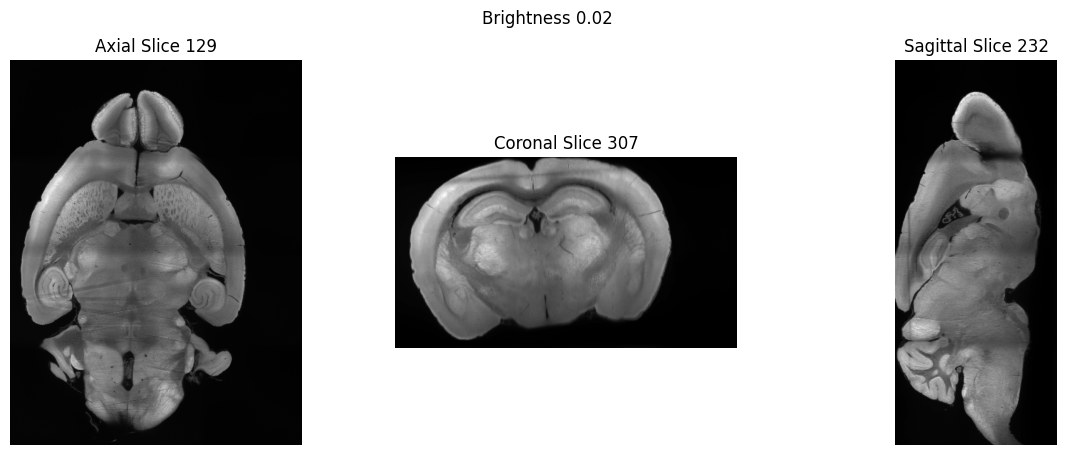

In [5]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import numpy as np
from skimage import io

# Load 3D TIF file
file_path = "resampled_auto.tif"  # Adjust the path to your file
image_data = io.imread(file_path)

# Interactive view of the 3D slices with brightness adjustment
def display_slices(axial_index, coronal_index, sagittal_index, brightness):
    # Adjust brightness
    axial_slice = np.clip(image_data[axial_index] * brightness, 0, 255).astype(np.uint8)
    coronal_slice = np.clip(image_data[:, coronal_index] * brightness, 0, 255).astype(np.uint8)
    sagittal_slice = np.clip(image_data[:, :, sagittal_index] * brightness, 0, 255).astype(np.uint8)

    # Plot the slices side by side
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(axial_slice, cmap="gray")
    axes[0].set_title(f"Axial Slice {axial_index}")
    axes[0].axis("off")

    axes[1].imshow(coronal_slice, cmap="gray")
    axes[1].set_title(f"Coronal Slice {coronal_index}")
    axes[1].axis("off")

    axes[2].imshow(sagittal_slice.T, cmap="gray")  # Transpose for correct orientation
    axes[2].set_title(f"Sagittal Slice {sagittal_index}")
    axes[2].axis("off")

    plt.suptitle(f"Brightness {brightness:.2f}")
    plt.show()

# Sliders for slice selection and brightness adjustment
interact(display_slices,
         axial_index=(0, image_data.shape[0] - 1),
         coronal_index=(0, image_data.shape[1] - 1),
         sagittal_index=(0, image_data.shape[2] - 1),
         brightness=FloatSlider(min=0.001, max=0.07, step=0.01, value=0.02, description='Brightness'));


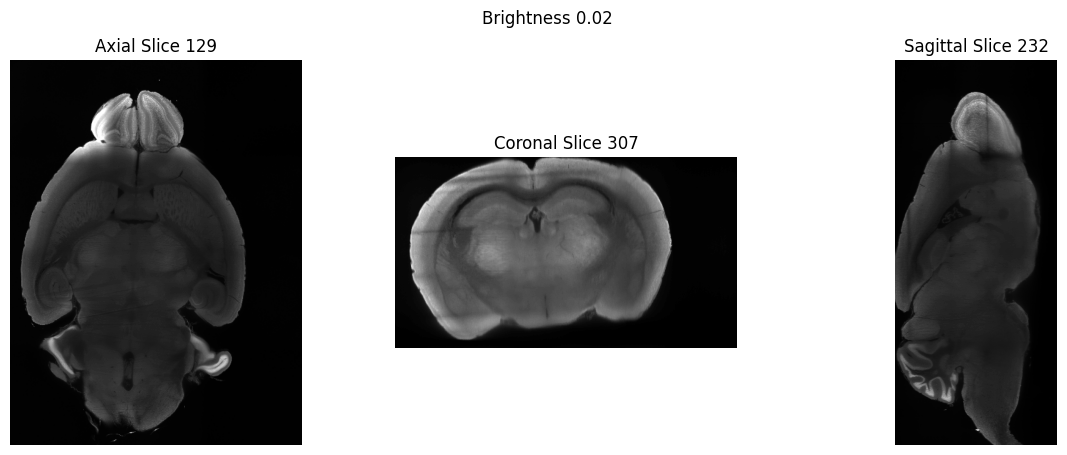

In [6]:
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
import numpy as np
from skimage import io

# Load 3D TIF file
file_path = "resampled.tif"  # Adjust the path to your file
image_data = io.imread(file_path)

# Interactive view of the 3D slices with brightness adjustment
def display_slices(axial_index, coronal_index, sagittal_index, brightness):
    # Adjust brightness
    axial_slice = np.clip(image_data[axial_index] * brightness, 0, 255).astype(np.uint8)
    coronal_slice = np.clip(image_data[:, coronal_index] * brightness, 0, 255).astype(np.uint8)
    sagittal_slice = np.clip(image_data[:, :, sagittal_index] * brightness, 0, 255).astype(np.uint8)

    # Plot the slices side by side
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(axial_slice, cmap="gray")
    axes[0].set_title(f"Axial Slice {axial_index}")
    axes[0].axis("off")

    axes[1].imshow(coronal_slice, cmap="gray")
    axes[1].set_title(f"Coronal Slice {coronal_index}")
    axes[1].axis("off")

    axes[2].imshow(sagittal_slice.T, cmap="gray")  # Transpose for correct orientation
    axes[2].set_title(f"Sagittal Slice {sagittal_index}")
    axes[2].axis("off")

    plt.suptitle(f"Brightness {brightness:.2f}")
    plt.show()

# Sliders for slice selection and brightness adjustment
interact(display_slices,
         axial_index=(0, image_data.shape[0] - 1),
         coronal_index=(0, image_data.shape[1] - 1),
         sagittal_index=(0, image_data.shape[2] - 1),
         brightness=FloatSlider(min=0.001, max=0.07, step=0.01, value=0.02, description='Brightness'));


### **5. Datenanalyse mit KI (30 Minuten)**
- **Hands-On Aktivität**:
  - Automatische Zellanalyse und Berechnungen.

In [13]:
#%pip install itkwidgets
# Registrierung
import itk
import itk
from itkwidgets import compare, checkerboard
import numpy as np

fixed_image = itk.imread(filenames[0], itk.F)
moving_image = itk.imread(filenames[2], itk.F)
parameter_object = itk.ParameterObject.New()
default_rigid_parameter_map = parameter_object.GetDefaultParameterMap('rigid')
parameter_object.AddParameterMap(default_rigid_parameter_map)


# Call registration function
result_image, result_transform_parameters = itk.elastix_registration_method(
    fixed_image, moving_image,
    parameter_object=parameter_object,
    log_to_console=False)

# Load Elastix Image Filter Object
elastix_object = itk.ElastixRegistrationMethod.New(fixed_image, moving_image)
# elastix_object.SetFixedImage(fixed_image)
# elastix_object.SetMovingImage(moving_image)
elastix_object.SetParameterObject(parameter_object)

# Set additional options
elastix_object.SetLogToConsole(False)

# Update filter object (required)
elastix_object.UpdateLargestPossibleRegion()

# Results of Registration
result_image = elastix_object.GetOutput()
result_transform_parameters = elastix_object.GetTransformParameterObject()

# Save image with itk
itk.imwrite(result_image,'result.tif')


In [14]:
anno_image = itk.imread(filenames[3], itk.F)
result_image_transformix = itk.transformix_filter(
    anno_image,
    result_transform_parameters)
itk.imwrite(result_image_transformix,'anno_result.tif')

### **6. Statistischer Vergleich und Visualisierung (25 Minuten)**
- **Statistische Tests** und Diagrammerstellung.

In [ ]:
# Platzhalter für Visualisierung
import matplotlib.pyplot as plt
data = [10, 15, 20, 25]
plt.plot(data)
plt.title("Zellzählungsergebnisse")
plt.show()

### **7. Abschluss und Diskussion (10 Minuten)**
- **Ergebnisse besprechen** und Reflexion.

In [ ]:
# Platzhalter für Diskussion
abschluss = "Die Analyse liefert spannende Einblicke in die Zelldichte."
print(abschluss)